In [79]:
import pandas as pd
import numpy as np

from metrics import print_metrics

from sklearn import tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import ParameterGrid

random_seed = 42

In [80]:
train = pd.read_csv("../data/featured/train.csv", sep=',')
val = pd.read_csv("../data/featured/val.csv", sep=',')

train['date'] = pd.to_datetime(train['date'])

Xtrain = train.drop(columns=['teamA_win'])
ytrain = train['teamA_win']

Xval = val.drop(columns=['teamA_win'])
yval = val['teamA_win']

display(Xtrain.shape, Xval.shape)

(4830, 55)

(209, 55)

In [81]:
min_date = Xtrain['date'].min()
max_date = Xtrain['date'].max()
sample_weight = (Xtrain['date'] - min_date) / (max_date - min_date)

Xtrain = Xtrain.drop(columns=['date'])
Xval = Xval.drop(columns=['date'])

In [82]:

display(Xtrain.columns, Xval.columns)
display(sample_weight.unique())
display(Xtrain.head())
display(Xtrain.tail())

Index(['diff_GP', 'diff_W', 'diff_L', 'diff_AGT', 'diff_K', 'diff_D',
       'diff_KD', 'diff_CKPM', 'diff_GSPD', 'diff_GD15', 'diff_FB%',
       'diff_FT%', 'diff_F3T%', 'diff_PPG', 'diff_HLD%', 'diff_GRB%',
       'diff_FD%', 'diff_DRG%', 'diff_ELD%', 'diff_FBN%', 'diff_BN%',
       'diff_LNE%', 'diff_JNG%', 'diff_WPM', 'diff_CWPM', 'diff_WCPM',
       'diff_winrate%', 'ratio_GP', 'ratio_W', 'ratio_L', 'ratio_AGT',
       'ratio_K', 'ratio_D', 'ratio_KD', 'ratio_CKPM', 'ratio_GSPD',
       'ratio_GD15', 'ratio_FB%', 'ratio_FT%', 'ratio_F3T%', 'ratio_PPG',
       'ratio_HLD%', 'ratio_GRB%', 'ratio_FD%', 'ratio_DRG%', 'ratio_ELD%',
       'ratio_FBN%', 'ratio_BN%', 'ratio_LNE%', 'ratio_JNG%', 'ratio_WPM',
       'ratio_CWPM', 'ratio_WCPM', 'ratio_winrate%'],
      dtype='object')

Index(['diff_GP', 'diff_W', 'diff_L', 'diff_AGT', 'diff_K', 'diff_D',
       'diff_KD', 'diff_CKPM', 'diff_GSPD', 'diff_GD15', 'diff_FB%',
       'diff_FT%', 'diff_F3T%', 'diff_PPG', 'diff_HLD%', 'diff_GRB%',
       'diff_FD%', 'diff_DRG%', 'diff_ELD%', 'diff_FBN%', 'diff_BN%',
       'diff_LNE%', 'diff_JNG%', 'diff_WPM', 'diff_CWPM', 'diff_WCPM',
       'diff_winrate%', 'ratio_GP', 'ratio_W', 'ratio_L', 'ratio_AGT',
       'ratio_K', 'ratio_D', 'ratio_KD', 'ratio_CKPM', 'ratio_GSPD',
       'ratio_GD15', 'ratio_FB%', 'ratio_FT%', 'ratio_F3T%', 'ratio_PPG',
       'ratio_HLD%', 'ratio_GRB%', 'ratio_FD%', 'ratio_DRG%', 'ratio_ELD%',
       'ratio_FBN%', 'ratio_BN%', 'ratio_LNE%', 'ratio_JNG%', 'ratio_WPM',
       'ratio_CWPM', 'ratio_WCPM', 'ratio_winrate%'],
      dtype='object')

array([0.06256861, 0.06147091, 0.06037322, 0.05927552, 0.05817783,
       0.05708013, 0.05598244, 0.05488474, 0.05378705, 0.05268935,
       0.05159166, 0.05049396, 0.04939627, 0.04829857, 0.04720088,
       0.04610318, 0.04500549, 0.04390779, 0.0428101 , 0.0417124 ,
       0.04061471, 0.03951701, 0.03841932, 0.03732162, 0.03622393,
       0.03512623, 0.03402854, 0.03293085, 0.03183315, 0.03073546,
       0.02963776, 0.02744237, 0.02634468, 0.02524698, 0.02414929,
       0.02305159, 0.0219539 , 0.0208562 , 0.01975851, 0.01866081,
       0.01756312, 0.01646542, 0.01536773, 0.01427003, 0.01317234,
       0.01207464, 0.01097695, 0.00987925, 0.00878156, 0.0845225 ,
       0.08013172, 0.07793633, 0.07683864, 0.07464325, 0.07354555,
       0.07244786, 0.07135016, 0.07025247, 0.06915477, 0.06805708,
       0.06695939, 0.18660812, 0.18551043, 0.18441273, 0.18331504,
       0.18221734, 0.18111965, 0.18002195, 0.17892426, 0.17782656,
       0.17672887, 0.17563117, 0.17453348, 0.17343578, 0.17233

,diff_GP,diff_W,diff_L,diff_AGT,diff_K,diff_D,diff_KD,diff_CKPM,diff_GSPD,diff_GD15,...,ratio_DRG%,ratio_ELD%,ratio_FBN%,ratio_BN%,ratio_LNE%,ratio_JNG%,ratio_WPM,ratio_CWPM,ratio_WCPM,ratio_winrate%
0,-1.0,9.0,-10.0,0.055581,82.0,-101.0,0.388915,0.000869,0.082794,-1.0,...,1.219350,-1.0,-1.0,1.306950,-1.0,1.069371,1.109382,1.231078,0.967008,1.688488
1,5.0,-3.0,8.0,-0.640347,-11.0,114.0,-0.244762,-0.006709,-0.056201,-1.0,...,0.794881,-1.0,-1.0,0.708776,-1.0,0.953334,0.877706,1.004095,0.834305,0.708332
2,1.0,4.0,-3.0,0.136499,68.0,11.0,0.120790,0.037707,0.034126,-1.0,...,1.209197,-1.0,-1.0,1.175859,-1.0,0.986239,1.235281,1.245390,1.069315,1.272346
3,-1.0,17.0,-18.0,0.240378,216.0,-238.0,1.042858,-0.003425,0.187001,-1.0,...,1.784309,-1.0,-1.0,2.033521,-1.0,1.182904,1.024753,0.909343,1.192385,2.973845
4,0.0,2.0,-2.0,0.185470,90.0,37.0,0.104944,0.078915,0.018091,-1.0,...,1.099998,-1.0,-1.0,0.882306,-1.0,1.065153,0.982302,1.158651,0.979531,1.090907


,diff_GP,diff_W,diff_L,diff_AGT,diff_K,diff_D,diff_KD,diff_CKPM,diff_GSPD,diff_GD15,...,ratio_DRG%,ratio_ELD%,ratio_FBN%,ratio_BN%,ratio_LNE%,ratio_JNG%,ratio_WPM,ratio_CWPM,ratio_WCPM,ratio_winrate%
4825,-1.0,-6.0,5.0,-1.289488,-59.0,130.0,-0.680309,0.214470,-0.097115,-1111.931373,...,0.492537,-1.0,0.423529,0.499999,0.984371,0.831606,0.927746,0.933795,0.799473,0.481283
4826,-6.0,-3.0,-3.0,-2.482321,-60.0,-69.0,0.084765,0.106705,0.026684,892.080972,...,1.298916,-1.0,1.879116,1.349997,0.998193,1.129093,1.053463,1.037561,1.055026,1.062935
4827,11.0,-1.0,-1.0,-2.005524,-1.0,-1.0,0.147568,-0.108276,-0.032156,-775.223623,...,0.794439,-1.0,0.536034,0.950223,0.980362,1.081482,1.122050,1.035832,1.004748,1.057773
4828,-7.0,-6.0,-1.0,-2.941667,-119.0,-76.0,-0.423137,0.018804,-0.026016,162.410256,...,1.002650,-1.0,0.000000,0.000000,0.989779,1.054021,1.115764,1.149891,0.892228,0.309523
4829,8.0,-1.0,-1.0,-3.740809,-1.0,-1.0,-0.468525,0.036533,-0.093199,-1102.709559,...,0.972315,-1.0,0.490383,0.377358,1.002245,0.936330,0.797531,1.095815,0.958607,0.411289


In [83]:
param_grid = {
    'max_depth': range(1,7),
    'min_samples_split': range(2,7),
    'min_samples_leaf': range(1,5)
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = DecisionTreeClassifier(random_state=random_seed, **params)
    clf.fit(Xtrain, ytrain, sample_weight=sample_weight)
    
    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Validation Accuracy: 0.6746411483253588


Accuracy: 0.6746411483253588
Confusion Matrix:
[[73 28]
 [40 68]]
F1 Score: 0.6666666666666666
Best Threshold (Youden's J statistic): 0.5558824893243008


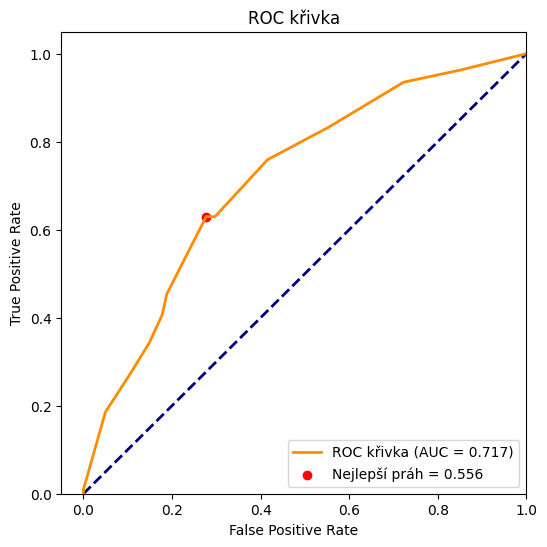

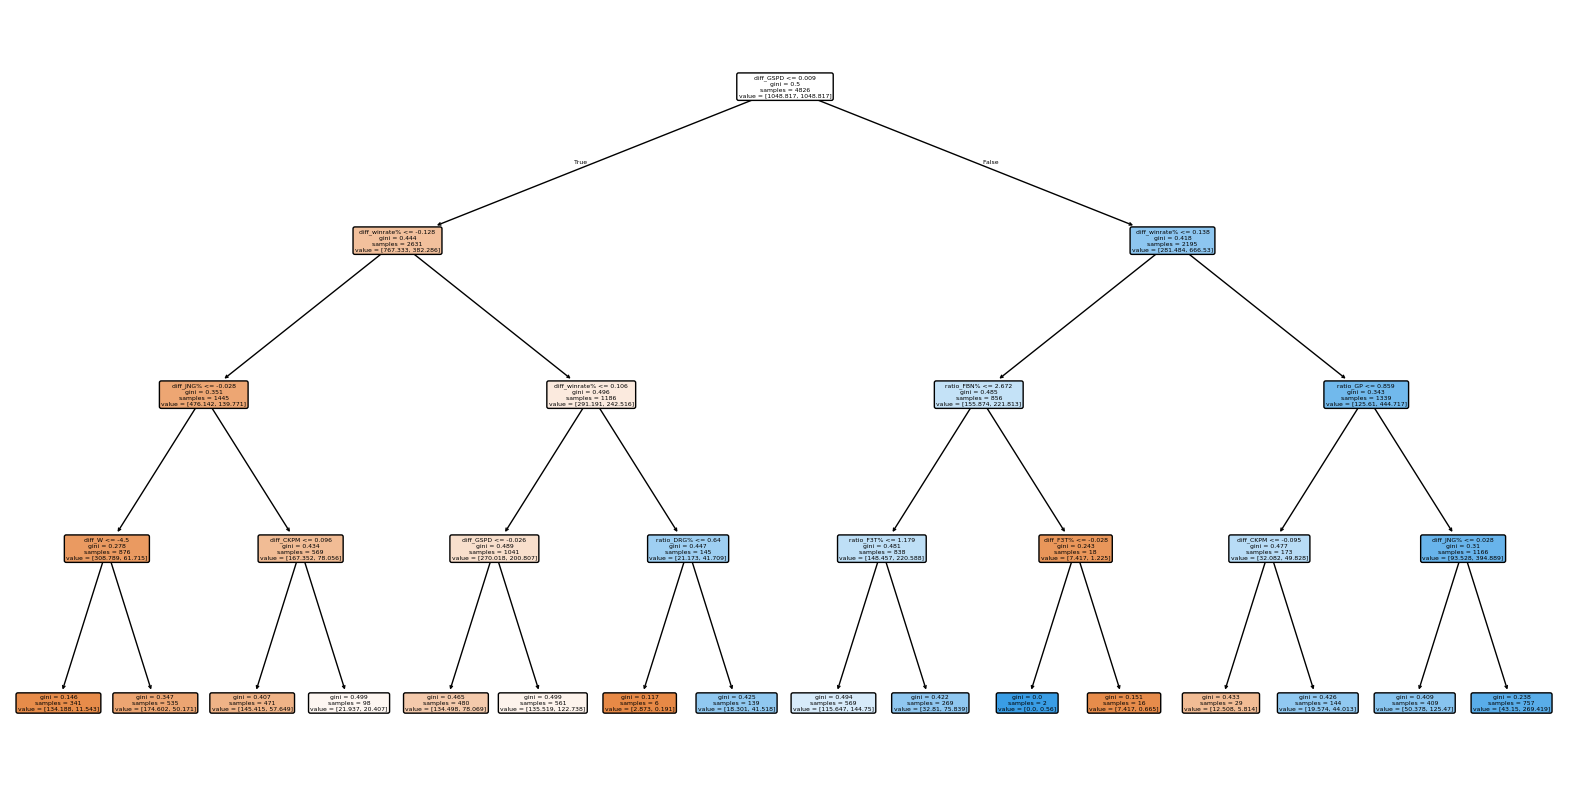

In [84]:
clfRF = DecisionTreeClassifier(random_state=random_seed, **best_params)
clfRF.fit(Xtrain, ytrain, sample_weight=sample_weight)

yval_pred = clfRF.predict(Xval)
yval_proba = clfRF.predict_proba(Xval)[:, 1]

print_metrics(yval, yval_pred, yval_proba)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clfRF,
    feature_names=list(Xtrain.columns),
    filled=True,
    rounded=True,
)
plt.show()